<a href="https://colab.research.google.com/github/machiwao/pjdsc-optima-prime-sakayan-express/blob/main/SakayanExpress_DemandMapping_unstable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakayan Express - Demand Mapping
Map passenger demand on a respective location. Predict number of passengers at a given time

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## Possible Mapping Sources

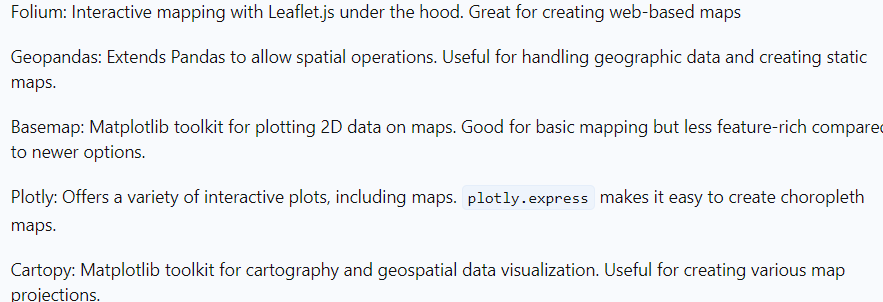

## Dataset Loading

In [107]:
# Raw Data
Belga_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_BELGA_withFuelData.csv"
Deocareza_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_DEOCAREZA_withFuelData.csv"
Graceda_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_GRACEDA_withFuelData.csv"
Manuel_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_MANUEL_withFuelData.csv"
Paralde_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_PARALDE_withFuelData.csv"

Carmelotes_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_CARMELOTES_withFuelData.csv"
Escuerdo_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_ESCUERDO_withFuelData.csv"
Graceda_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_GRACEDA_withFuelData.csv"
Neri_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_NERI_withFuelData.csv"
Ostan_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_OSTAN_withFuelData.csv"

Bajaro_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_BAJARO.csv"
Escuerdo_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_ESCUERDO_withFuelData.csv"
Graceda_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_GRACEDA_withFuelData.csv"
Neri_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_NERI_withFuelData.csv"
Ostan_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_OSTAN_withFuelData.csv"

Belga_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_BELGA_withFuelData.csv"
Caralde_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_CARALDE_withFuelData.csv"

Arangco_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_ARANGCO.csv"
Ceballos_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_CEBALLOS.csv"
Delosreyes_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_DELOSREYES.csv"
Fontillas_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_FONTILLAS_withFuelData.csv"
Lina_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_LINA.csv"
Neri_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_NERI_withFuelData.csv"

Arango_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_ARANGO.csv"
Bolata_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_BOLATA.csv"
Gipa_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_GIPA.csv"
Loy_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_LOY.csv"
Porquez_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_PORQUEZ.csv"

Arango_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_ARANGO.csv"
Gipa_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_GIPA.csv"
Ubusan_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_UBUSAN.csv"

Delos_Reyes_0728_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0728_Delos_Reyes.csv"

In [108]:
# Cleaned Data
arango_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arangco_0718.csv"
arango_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arango_0719.csv"
arango_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arango_0721.csv"
bajaro_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/bajaro_0713.csv"
belga_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/belga_0711.csv"
belga_0717 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/belga_0717.csv"
bolata_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/bolata_0719.csv"
caralde_0717 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/caralde_0717.csv"
carmelotes_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/carmelotes_0712.csv"
ceballos_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ceballos_0718.csv"
delosreyes_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/delosreyes_0718.csv"
deocareza_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/deocareza_0711.csv"
escuerdos_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/escuerdos_0712.csv"
escuerdos_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/escuerdos_0713.csv"
fontillas_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/fontillas_0718.csv"
gipa_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/gipa_0719.csv"
gipa_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/gipa_0721.csv"
graceda_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0711.csv"
graceda_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0712.csv"
graceda_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0713.csv"
lina_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/lina_0718.csv"
loy_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/loy_0719.csv"
manuel_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/manuel_0711.csv"
neri_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0712.csv"
neri_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0713.csv"
neri_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0718.csv"
ostan_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ostan_0712.csv"
ostan_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ostan_0713.csv"
paralde_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/paralde_0711.csv"
porquez_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/porquez_0719.csv"
ubusan_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ubusan_0721.csv"

In [109]:
df_1_0711 = pd.read_csv(belga_0711)
df_1_0711['bus_dispatched'] = 3;
df_1_0711['bus_driver'] = 3

df_2_0711 = pd.read_csv(deocareza_0711)
df_2_0711['bus_dispatched'] = 1
df_2_0711['bus_driver'] = 1

df_3_0711 = pd.read_csv(graceda_0711)
df_3_0711['bus_dispatched'] = 2;
df_3_0711['bus_driver'] = 2

df_4_0711 = pd.read_csv(manuel_0711)
df_4_0711['bus_dispatched'] = 4;
df_4_0711['bus_driver'] = 4

df_5_0711 = pd.read_csv(paralde_0711)
df_5_0711['bus_dispatched'] = 5;
df_5_0711['bus_driver'] = 5

df_0711 = pd.concat([df_1_0711, df_2_0711, df_3_0711, df_4_0711, df_5_0711],
                    ignore_index=True)

In [110]:
df_1_0712 = pd.read_csv(graceda_0712)
df_1_0712['bus_dispatched'] = 6;
df_1_0712['bus_driver'] = 2;

df_2_0712 = pd.read_csv(neri_0712)
df_2_0712['bus_dispatched'] =10;
df_2_0712['bus_driver'] = 9;

df_3_0712 = pd.read_csv(ostan_0712)
df_3_0712['bus_dispatched'] = 8;
df_3_0712['bus_driver'] = 7;

df_4_0712 = pd.read_csv(carmelotes_0712)
df_4_0712['bus_dispatched'] = 9;
df_4_0712['bus_driver'] = 8;

df_5_0712 = pd.read_csv(escuerdos_0712)
df_5_0712['bus_dispatched'] = 7;
df_5_0712['bus_driver'] = 6;

df_0712 = pd.concat([df_1_0712, df_2_0712, df_3_0712, df_4_0712, df_5_0712],
                    ignore_index=True)

In [111]:
df_1_0713 = pd.read_csv(escuerdos_0713)
df_1_0713['bus_dispatched'] = 14;
df_1_0713['bus_driver'] = 6;

df_2_0713 = pd.read_csv(neri_0713)
df_2_0713['bus_dispatched'] =13;
df_2_0713['bus_driver'] = 9;

df_3_0713 = pd.read_csv(ostan_0713)
df_3_0713['bus_dispatched'] = 12;
df_3_0713['bus_driver'] = 7;

df_4_0713 = pd.read_csv(graceda_0713)
df_4_0713['bus_dispatched'] = 11;
df_4_0713['bus_driver'] = 2;

df_5_0713 = pd.read_csv(bajaro_0713)
df_5_0713['bus_dispatched'] = 15;
df_5_0713['bus_driver'] = 10;

df_0713 = pd.concat([df_1_0713, df_2_0713, df_3_0713, df_4_0713, df_5_0713],
               ignore_index=True)

In [112]:
df_1_0717 = pd.read_csv(belga_0717)
df_1_0717['bus_dispatched'] = 17;
df_1_0717['bus_driver'] = 3;

df_2_0717 = pd.read_csv(caralde_0717)
df_2_0717['bus_dispatched'] =16;
df_2_0717['bus_driver'] = 11;

df_0717 = pd.concat([df_1_0717, df_2_0717], ignore_index=True)

In [113]:
df_1_0718 = pd.read_csv(arango_0718)
df_1_0718['bus_dispatched'] = 23;
df_1_0718['bus_driver'] = 16;

df_2_0718 = pd.read_csv(neri_0718)
df_2_0718['bus_dispatched'] =18;
df_2_0718['bus_driver'] = 9;

df_3_0718 = pd.read_csv(lina_0718)
df_3_0718['bus_dispatched'] = 20;
df_3_0718['bus_driver'] = 13;

df_4_0718 = pd.read_csv(fontillas_0718)
df_4_0718['bus_dispatched'] = 19;
df_4_0718['bus_driver'] = 12;

df_5_0718 = pd.read_csv(delosreyes_0718)
df_5_0718['bus_dispatched'] = 21;
df_5_0718['bus_driver'] = 14;

df_6_0718 = pd.read_csv(ceballos_0718)
df_6_0718['bus_dispatched'] = 22;
df_6_0718['bus_driver'] = 15;

df_0718 = pd.concat([df_1_0718, df_2_0718, df_3_0718, df_4_0718, df_5_0718,
                df_6_0718], ignore_index=True)

In [114]:
df_1_0719 = pd.read_csv(arango_0719)
df_1_0719['bus_dispatched'] = 27;
df_1_0719['bus_driver'] = 16;

df_2_0719 = pd.read_csv(bolata_0719)
df_2_0719['bus_dispatched'] =28;
df_2_0719['bus_driver'] = 20;

df_3_0719 = pd.read_csv(gipa_0719)
df_3_0719['bus_dispatched'] = 25;
df_3_0719['bus_driver'] = 18;

df_4_0719 = pd.read_csv(loy_0719)
df_4_0719['bus_dispatched'] = 26;
df_4_0719['bus_driver'] = 19;

df_5_0719 = pd.read_csv(porquez_0719)
df_5_0719['bus_dispatched'] = 24;
df_5_0719['bus_driver'] = 17;

df_0719 = pd.concat([df_1_0719, df_2_0719, df_3_0719, df_4_0719, df_5_0719],
                    ignore_index=True)

In [115]:
df_1_0721 = pd.read_csv(arango_0721)
df_1_0721['bus_dispatched'] = 31;
df_1_0721['bus_driver'] = 16;

df_2_0721 = pd.read_csv(gipa_0721)
df_2_0721['bus_dispatched'] =29;
df_2_0721['bus_driver'] = 18;

df_3_0721 = pd.read_csv(ubusan_0721)
df_3_0721['bus_dispatched'] =30;
df_3_0721['bus_driver'] = 21;

df_0721 = pd.concat([df_1_0721, df_2_0721, df_3_0721], ignore_index=True)

In [116]:
df = pd.concat([df_0711, df_0712, df_0713, df_0717, df_0718, df_0719, df_0721],
               ignore_index=True)

In [117]:
df.sample(10)

longitude   latitude            timestamp  Board  Alight  Numpass  \
68149    121.042598  14.636293  2023-07-11 06:01:10      0       0     40.0   
535883   121.036385  14.556215  2023-07-13 17:21:51      0       0     23.0   
250828   121.053478  14.614168  2023-07-12 09:43:16      0       0     36.0   
1275797  120.991730  14.536705  2023-07-21 22:41:02      0       0     28.0   
878745   120.986658  14.657170  2023-07-18 11:18:06      0       0      0.0   
1333940  121.029290  14.550368  2023-07-21 22:45:12      0       0     33.0   
1340084  121.046037  14.568938  2023-07-21 06:12:52      0       0      9.0   
478976   121.023338  14.545283  2023-07-13 08:12:50      0       0     24.0   
644823   121.012568  14.539123  2023-07-13 20:22:14      0       0      0.0   
495023   121.033150  14.651075  2023-07-13 16:46:03      0       0     73.0   

         Hour   Min   Sec  Day_of_week  ...   direction  QuarterHour  \
68149     6.0   1.0  10.0            1  ...  Southbound            0   
535883   17.0  21.0  51.0            3  ...  Southbound            0   
250828    9.0  43.0  16.0            2  ...  Southbound            7   
1275797  22.0  41.0   2.0            4  ...  Southbound            7   
878745   11.0  18.0   6.0            1  ...  Northbound            3   
1333940  22.0  45.0  12.0            4  ...  Northbound            8   
1340084   6.0  12.0  52.0            4  ...  Southbound            2   
478976    8.0  12.0  50.0            3  ...  Southbound            2   
644823   20.0  22.0  14.0            3  ...  Northbound            0   
495023   16.0  46.0   3.0            3  ...  Northbound            8   

         northbound_waiting_passengers  southbound_waiting_passengers  \
68149                              0.0                            0.0   
535883                             NaN                            NaN   
250828                             NaN                            NaN   
1275797                            NaN                            NaN   
878745                             NaN                            NaN   
1333940                            NaN                            NaN   
1340084                            NaN                            NaN   
478976                             NaN                            NaN   
644823                             NaN                            NaN   
495023                             NaN                            NaN   

         bus_dispatched bus_driver  accelY...21  DRIVER  driver  \
68149                 1          1         38.0     NaN     NaN   
535883               12          7          NaN     NaN     NaN   
250828                6          2          NaN     NaN     NaN   
1275797              31         16          NaN     NaN     NaN   
878745               19         12          NaN     NaN     NaN   
1333940              29         18          NaN     NaN     NaN   
1340084              30         21          NaN     NaN     NaN   
478976               13          9          NaN     NaN     NaN   
644823               15         10          NaN     NaN     NaN   
495023               13          9          NaN     NaN     NaN   

         waiting_passengers  
68149                   NaN  
535883                  0.0  
250828                  0.0  
1275797                 0.0  
878745                  0.0  
1333940                 0.0  
1340084                 0.0  
478976                  0.0  
644823                  0.0  
495023                  0.0  

[10 rows x 25 columns]

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374479 entries, 0 to 1374478
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   longitude                      1374479 non-null  float64
 1   latitude                       1374479 non-null  float64
 2   timestamp                      1374479 non-null  object 
 3   Board                          1374479 non-null  int64  
 4   Alight                         1374479 non-null  int64  
 5   Numpass                        1374479 non-null  float64
 6   Hour                           1374479 non-null  float64
 7   Min                            1374479 non-null  float64
 8   Sec                            1374479 non-null  float64
 9   Day_of_week                    1374479 non-null  int64  
 10  stop_cluster                   1374479 non-null  int64  
 11  distance_from_cluster_0        1374479 non-null  float64
 12  distance_from_

In [119]:
df.describe()

longitude      latitude         Board        Alight       Numpass  \
count  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06   
mean   1.210164e+02  1.458254e+01  1.202710e-02  1.261060e-02  2.342261e+01   
std    2.480509e-02  5.413315e-02  1.090067e-01  1.115866e-01  1.622190e+01   
min    1.209834e+02  1.450272e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.209914e+02  1.453725e+01  0.000000e+00  0.000000e+00  1.300000e+01   
50%    1.210119e+02  1.456513e+01  0.000000e+00  0.000000e+00  2.100000e+01   
75%    1.210392e+02  1.464474e+01  0.000000e+00  0.000000e+00  3.200000e+01   
max    1.210608e+02  1.473059e+01  1.000000e+00  1.000000e+00  1.240000e+02   

               Hour           Min           Sec   Day_of_week  stop_cluster  \
count  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06   
mean   1.317312e+01  2.945211e+01  2.948634e+01  1.879884e+00  9.221755e+00   
std    5.064981e+00  1.725546e+01  1.730206e+01  1.118137e+00  5.879407e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    9.000000e+00  1.500000e+01  1.400000e+01  1.000000e+00  4.000000e+00   
50%    1.300000e+01  2.900000e+01  3.000000e+01  2.000000e+00  9.000000e+00   
75%    1.700000e+01  4.400000e+01  4.400000e+01  3.000000e+00  1.400000e+01   
max    2.300000e+01  5.900000e+01  5.900000e+01  5.000000e+00  2.000000e+01   

       ...  distance_from_cluster_18  dist_change_cluster_0  \
count  ...              1.374479e+06           1.374448e+06   
mean   ...              8.793703e+00          -1.101246e-05   
std    ...              6.115880e+00           4.098702e-01   
min    ...              1.184367e-03          -1.652432e+01   
25%    ...              2.958139e+00           0.000000e+00   
50%    ...              8.417759e+00           0.000000e+00   
75%    ...              1.571583e+01           0.000000e+00   
max    ...              2.513408e+01           1.661382e+01   

       dist_change_cluster_18   QuarterHour  northbound_waiting_passengers  \
count            1.374448e+06  1.374479e+06                  230426.000000   
mean             3.787546e-05  4.568506e+00                       0.059859   
std              5.031941e-01  3.320567e+00                       0.660993   
min             -1.652018e+01  0.000000e+00                       0.000000   
25%              0.000000e+00  1.000000e+00                       0.000000   
50%              0.000000e+00  4.000000e+00                       0.000000   
75%              0.000000e+00  7.000000e+00                       0.000000   
max              1.661288e+01  1.000000e+01                      12.000000   

       southbound_waiting_passengers  bus_dispatched    bus_driver  \
count                  230426.000000    1.374479e+06  1.374479e+06   
mean                        0.041224    1.606601e+01  1.009295e+01   
std                         0.654215    9.194897e+00  6.098520e+00   
min                         0.000000    1.000000e+00  1.000000e+00   
25%                         0.000000    8.000000e+00  5.000000e+00   
50%                         0.000000    1.600000e+01  9.000000e+00   
75%                         0.000000    2.500000e+01  1.600000e+01   
max                        16.000000    3.100000e+01  2.100000e+01   

        accelY...21  waiting_passengers  
count  61611.000000        1.144053e+06  
mean      30.736346        9.058933e-02  
std       57.791832        9.800164e-01  
min     -338.000000        0.000000e+00  
25%        5.000000        0.000000e+00  
50%       15.000000        0.000000e+00  
75%       37.000000        0.000000e+00  
max      866.000000        3.000000e+01  

[8 rows x 21 columns]

In [120]:
df.isnull().sum()

longitude                              0
latitude                               0
timestamp                              0
Board                                  0
Alight                                 0
Numpass                                0
Hour                                   0
Min                                    0
Sec                                    0
Day_of_week                            0
stop_cluster                           0
distance_from_cluster_0                0
distance_from_cluster_18               0
dist_change_cluster_0                 31
dist_change_cluster_18                31
direction                            192
QuarterHour                            0
northbound_waiting_passengers    1144053
southbound_waiting_passengers    1144053
bus_dispatched                         0
bus_driver                             0
accelY...21                      1312868
DRIVER                           1333317
driver                           1339446
waiting_passengers                230426
dtype: int64

In [121]:
df.duplicated().sum()

1154

## Data Cleaning Pipeline

### Commuter Demand Data
Time-based Features: Hour, Min, Sec, Timestamp, Date, Day of the week

Location-based Features: Longitude, latitude

Passenger data: Board, Alight, Numpass

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374479 entries, 0 to 1374478
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   longitude                      1374479 non-null  float64
 1   latitude                       1374479 non-null  float64
 2   timestamp                      1374479 non-null  object 
 3   Board                          1374479 non-null  int64  
 4   Alight                         1374479 non-null  int64  
 5   Numpass                        1374479 non-null  float64
 6   Hour                           1374479 non-null  float64
 7   Min                            1374479 non-null  float64
 8   Sec                            1374479 non-null  float64
 9   Day_of_week                    1374479 non-null  int64  
 10  stop_cluster                   1374479 non-null  int64  
 11  distance_from_cluster_0        1374479 non-null  float64
 12  distance_from_

In [123]:
cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec', 'bus_dispatched',
        'bus_driver']
# cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec']

In [124]:
df = df[cols]

In [125]:
df.sample(10)

longitude   latitude            timestamp  Board  Alight  Numpass  \
1236826  121.028268  14.550173  2023-07-21 10:55:45      0       0     31.0   
1116796  120.983587  14.534858  2023-07-19 07:06:02      0       0     15.0   
525716   121.003785  14.538052  2023-07-13 12:13:09      0       0      9.0   
280218   121.045325  14.565830  2023-07-12 19:26:06      0       0     45.0   
442470   120.999392  14.537500  2023-07-13 11:27:19      0       0     16.0   
492972   121.002748  14.537477  2023-07-13 16:04:13      0       0     13.0   
246746   121.036938  14.645138  2023-07-12 08:37:19      0       0     22.0   
1180725  121.057117  14.605945  2023-07-19 14:42:43      0       0     32.0   
126566   120.986825  14.657262  2023-07-11 05:18:44      0       0      0.0   
973918   121.052095  14.617358  2023-07-18 09:54:58      0       0     23.0   

         Hour   Min   Sec  bus_dispatched  bus_driver  
1236826  10.0  55.0  45.0              31          16  
1116796   7.0   6.0   2.0              25          18  
525716   12.0  13.0   9.0              12           7  
280218   19.0  26.0   6.0              10           9  
442470   11.0  27.0  19.0              14           6  
492972   16.0   4.0  13.0              13           9  
246746    8.0  37.0  19.0               6           2  
1180725  14.0  42.0  43.0              26          19  
126566    5.0  18.0  44.0               2           2  
973918    9.0  54.0  58.0              22          15

In [126]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed', errors='coerce')
df['Hour'] = df['timestamp'].dt.hour
df['Min'] = df['timestamp'].dt.minute
df['Sec'] = df['timestamp'].dt.second
df['Time'] = df['timestamp'].dt.time
df['datePH'] = df['timestamp'].dt.date
df['Day_of_week'] = df['timestamp'].dt.dayofweek

In [127]:
df['Board'].ffill(inplace = True)
df['Alight'].ffill(inplace = True)
df['Numpass'].ffill(inplace = True)

In [128]:
df.isna().sum()

longitude         0
latitude          0
timestamp         0
Board             0
Alight            0
Numpass           0
Hour              0
Min               0
Sec               0
bus_dispatched    0
bus_driver        0
Time              0
datePH            0
Day_of_week       0
dtype: int64

In [129]:
df.duplicated().sum()

2381

In [130]:
df.dropna(inplace = True)

In [131]:
df.drop_duplicates(inplace = True)

In [132]:
# Specific Bus Stops
Monumento = (14.658796024391433, 120.98613030490293)
Bagong_Barrio = (14.658962098122908, 120.99840409277799)
Balintawak = (14.657632440251607, 121.00489616829053)
Kaingin = (14.659207715596748, 121.01043239008315)
Roosevelt = (14.65946031850859, 121.01960427287607)
North_Avenue = (14.651404132967716, 121.03290009938868)
Quezon_Avenue = (14.64156852785517, 121.03927593922376)
Mega_Q_Mart = (14.629060928076612, 121.04671379361375)
Main_Avenue = (14.615051484903669, 121.05341714648678)
Santolan = (14.609827993592939, 121.05501086998106)
Ortigas = (14.589274921830608, 121.05698223579455)
Guadalupe = (14.567240858915584, 121.04520617378073)
Buendia = (14.557616094605738, 121.03343011212988)
Ayala = (14.549698211553858, 121.02900386156698)
One_Ayala_Terminal = (14.550471629678954, 121.02787120603641)
Tramo = (14.540645092074023, 121.00359742139625)
Taft_Avenue = (14.538392473279682, 120.99945327510484)
Roxas_Boulevard = (14.53706735510947, 120.99218776274249)
MOA = (14.53684543526199, 120.98357811498406)
Macapagal_Bradco_Avenue = (14.5300528927701, 120.98961227061899)
City_of_Dreams = (14.524975658136254, 120.99059974706373)
Ayala_Malls_Manila_Bay = (14.523068542733853, 120.99008185576514)
PITX_Terminal = (14.510338360322828, 120.99126572649949)

bus_stops = [Monumento, Bagong_Barrio, Balintawak, Kaingin, Roosevelt, North_Avenue,
             Quezon_Avenue, Mega_Q_Mart, Main_Avenue, Santolan, Ortigas, Guadalupe,
             Buendia, Ayala, One_Ayala_Terminal, Tramo, Taft_Avenue, Roxas_Boulevard,
             MOA, Macapagal_Bradco_Avenue, City_of_Dreams, Ayala_Malls_Manila_Bay,
             PITX_Terminal]


In [133]:
'''from sklearn.cluster import KMeans

k = 23 # Currently 23 bus stops in total whether NB or SB

initial_centroids = np.array([Monumento, Bagong_Barrio, Balintawak, Kaingin,
                              Roosevelt, North_Avenue, Quezon_Avenue, Mega_Q_Mart,
                              Main_Avenue, Santolan, Ortigas, Guadalupe, Buendia,
                              Ayala, One_Ayala_Terminal, Tramo, Taft_Avenue,
                              Roxas_Boulevard, MOA, Macapagal_Bradco_Avenue,
                              City_of_Dreams, Ayala_Malls_Manila_Bay, PITX_Terminal])

# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns
kmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1, random_state=42)
# kmeans = KMeans(n_clusters=21, random_state=42)'''

'from sklearn.cluster import KMeans\n\nk = 23 # Currently 23 bus stops in total whether NB or SB\n\ninitial_centroids = np.array([Monumento, Bagong_Barrio, Balintawak, Kaingin,\n                              Roosevelt, North_Avenue, Quezon_Avenue, Mega_Q_Mart,\n                              Main_Avenue, Santolan, Ortigas, Guadalupe, Buendia,\n                              Ayala, One_Ayala_Terminal, Tramo, Taft_Avenue,\n                              Roxas_Boulevard, MOA, Macapagal_Bradco_Avenue,\n                              City_of_Dreams, Ayala_Malls_Manila_Bay, PITX_Terminal])\n\n# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns\nkmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1, random_state=42)\n# kmeans = KMeans(n_clusters=21, random_state=42)'

In [134]:
from geopy.distance import geodesic

def find_nearest_bus_stop(row, bus_stops):
    passenger_location = (row['latitude'], row['longitude'])
    distances = [geodesic(passenger_location, stop).meters for stop in bus_stops]
    nearest_stop_idx = np.argmin(distances)
    return nearest_stop_idx  # Returns the index of the nearest bus stop

In [135]:
# Apply the function only to rows where Board == True
df.loc[df['Board'] == True, 'nearest_bus_stop'] = df[df['Board'] == True].apply(
    find_nearest_bus_stop, axis=1, bus_stops=bus_stops
)

# Optional: If you want to map to bus stop names, you can add this step
# df.loc[df['Board'] == True, 'nearest_bus_stop_name'] = df.loc[df['Board'] == True, 'nearest_bus_stop'].map(lambda x: bus_stop_names[x])


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372098 entries, 0 to 1374478
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   longitude         1372098 non-null  float64       
 1   latitude          1372098 non-null  float64       
 2   timestamp         1372098 non-null  datetime64[ns]
 3   Board             1372098 non-null  int64         
 4   Alight            1372098 non-null  int64         
 5   Numpass           1372098 non-null  float64       
 6   Hour              1372098 non-null  int32         
 7   Min               1372098 non-null  int32         
 8   Sec               1372098 non-null  int32         
 9   bus_dispatched    1372098 non-null  int64         
 10  bus_driver        1372098 non-null  int64         
 11  Time              1372098 non-null  object        
 12  datePH            1372098 non-null  object        
 13  Day_of_week       1372098 non-null  int32      

In [137]:
df['nearest_bus_stop'].bfill(inplace = True)

In [138]:
df[df['Board']==True]

longitude   latitude           timestamp  Board  Alight  Numpass  \
18       120.988783  14.507963 2023-07-11 04:01:13      1       0     15.0   
28       120.988768  14.507970 2023-07-11 04:01:22      1       0     16.0   
312      120.990620  14.524773 2023-07-11 04:05:48      1       0     16.0   
504      120.988995  14.535418 2023-07-11 04:08:44      1       0     16.0   
524      120.988997  14.535923 2023-07-11 04:09:03      1       0     17.0   
...             ...        ...                 ...    ...     ...      ...   
1373956  121.020132  14.657702 2023-07-21 18:23:32      1       0     51.0   
1373958  121.020132  14.657702 2023-07-21 18:23:33      1       0     52.0   
1373959  121.020132  14.657702 2023-07-21 18:23:34      1       0     53.0   
1373963  121.020132  14.657702 2023-07-21 18:23:37      1       0     54.0   
1373966  121.020132  14.657702 2023-07-21 18:23:39      1       0     55.0   

         Hour  Min  Sec  bus_dispatched  bus_driver      Time      datePH  \
18          4    1   13               3           3  04:01:13  2023-07-11   
28          4    1   22               3           3  04:01:22  2023-07-11   
312         4    5   48               3           3  04:05:48  2023-07-11   
504         4    8   44               3           3  04:08:44  2023-07-11   
524         4    9    3               3           3  04:09:03  2023-07-11   
...       ...  ...  ...             ...         ...       ...         ...   
1373956    18   23   32              30          21  18:23:32  2023-07-21   
1373958    18   23   33              30          21  18:23:33  2023-07-21   
1373959    18   23   34              30          21  18:23:34  2023-07-21   
1373963    18   23   37              30          21  18:23:37  2023-07-21   
1373966    18   23   39              30          21  18:23:39  2023-07-21   

         Day_of_week  nearest_bus_stop  
18                 1              22.0  
28                 1              22.0  
312                1              20.0  
504                1              17.0  
524                1              17.0  
...              ...               ...  
1373956            4               4.0  
1373958            4               4.0  
1373959            4               4.0  
1373963            4               4.0  
1373966            4               4.0  

[16523 rows x 15 columns]

In [139]:
df['Board'] = df['Board'].astype(int)
df['Alight'] = df['Alight'].astype(int)

In [140]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth
    (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = [np.radians(coord) for coord in [lat1, lon1, lat2, lon2]]

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


In [141]:
'''centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")'''

'centroids = kmeans.cluster_centers_\nfor i, centroid in enumerate(centroids):\n    print(f"Cluster {i}: {centroid}")'

In [142]:
df['Day_of_week'] = df['timestamp'].dt.weekday

In [143]:
df.head()

longitude   latitude           timestamp  Board  Alight  Numpass  Hour  \
0  120.989040  14.507968 2023-07-11 04:00:55      0       0     14.0     4   
1  120.988890  14.507952 2023-07-11 04:00:56      0       0     14.0     4   
2  120.988825  14.507938 2023-07-11 04:00:57      0       0     14.0     4   
3  120.988810  14.507935 2023-07-11 04:00:58      0       0     14.0     4   
4  120.988802  14.507937 2023-07-11 04:00:59      0       0     14.0     4   

   Min  Sec  bus_dispatched  bus_driver      Time      datePH  Day_of_week  \
0    0   55               3           3  04:00:55  2023-07-11            1   
1    0   56               3           3  04:00:56  2023-07-11            1   
2    0   57               3           3  04:00:57  2023-07-11            1   
3    0   58               3           3  04:00:58  2023-07-11            1   
4    0   59               3           3  04:00:59  2023-07-11            1   

   nearest_bus_stop  
0              22.0  
1              22.0  
2              22.0  
3              22.0  
4              22.0

In [144]:
# Define the coordinates for the end clusters (example values)
northmost_coords = Monumento  # Example coordinates for cluster 0 (northmost terminal)
southmost_coords = PITX_Terminal  # Example coordinates for cluster 18 (southmost terminal)

def calculate_distance_from_terminals(df):
    """
    Calculates the distance of each bus stop from the two end terminals (cluster 0 and cluster 18).
    Adds columns for distance_from_cluster_0 and distance_from_cluster_18.

    Args:
    - df: DataFrame with latitude and longitude columns

    Returns:
    - DataFrame with added 'distance_from_cluster_0' and 'distance_from_cluster_18' columns
    """
    # Calculate distances from cluster 0 (northmost terminal)
    df['distance_from_north'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], northmost_coords[0], northmost_coords[1]), axis=1)

    # Calculate distances from cluster 18 (southmost terminal)
    df['distance_from_south'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], southmost_coords[0], southmost_coords[1]), axis=1)

    return df

In [145]:
df = calculate_distance_from_terminals(df)

In [146]:
def determine_direction_based_on_terminals(df):
    """
    Determines the bus direction (Northbound or Southbound) based on the proximity
    of the bus to the end terminals (clusters 0 and 18). If the bus is moving closer to
    cluster 0, it's Northbound; if it's moving closer to cluster 18, it's Southbound.

    Args:
    - df: DataFrame that contains 'distance_from_north' and 'distance_from_south' columns

    Returns:
    - DataFrame with a 'direction' column
    """
    # Calculate the difference in distance between consecutive rows to determine direction
    df['dist_change_north'] = df['distance_from_north'].diff()
    df['dist_change_south'] = df['distance_from_south'].diff()

    # Determine direction based on the distance change
    df['direction'] = df.apply(lambda row: 'Northbound' if row['dist_change_north'] < 0 else 'Southbound' if row['dist_change_south'] < 0 else None, axis=1)

    # Forward fill to propagate the last known direction when stationary
    df['direction'] = df['direction'].ffill()
    df['direction'] = df['direction'].bfill()

    return df

In [147]:
df = determine_direction_based_on_terminals(df)
df

longitude   latitude           timestamp  Board  Alight  Numpass  \
0        120.989040  14.507968 2023-07-11 04:00:55      0       0     14.0   
1        120.988890  14.507952 2023-07-11 04:00:56      0       0     14.0   
2        120.988825  14.507938 2023-07-11 04:00:57      0       0     14.0   
3        120.988810  14.507935 2023-07-11 04:00:58      0       0     14.0   
4        120.988802  14.507937 2023-07-11 04:00:59      0       0     14.0   
...             ...        ...                 ...    ...     ...      ...   
1374474  120.986592  14.657210 2023-07-21 18:33:39      0       0      0.0   
1374475  120.986592  14.657210 2023-07-21 18:33:40      0       0      0.0   
1374476  120.986592  14.657210 2023-07-21 18:33:41      0       0      0.0   
1374477  120.986592  14.657210 2023-07-21 18:33:42      0       0      0.0   
1374478  120.986592  14.657210 2023-07-21 18:33:43      0       0      0.0   

         Hour  Min  Sec  bus_dispatched  bus_driver      Time      datePH  \
0           4    0   55               3           3  04:00:55  2023-07-11   
1           4    0   56               3           3  04:00:56  2023-07-11   
2           4    0   57               3           3  04:00:57  2023-07-11   
3           4    0   58               3           3  04:00:58  2023-07-11   
4           4    0   59               3           3  04:00:59  2023-07-11   
...       ...  ...  ...             ...         ...       ...         ...   
1374474    18   33   39              30          21  18:33:39  2023-07-21   
1374475    18   33   40              30          21  18:33:40  2023-07-21   
1374476    18   33   41              30          21  18:33:41  2023-07-21   
1374477    18   33   42              30          21  18:33:42  2023-07-21   
1374478    18   33   43              30          21  18:33:43  2023-07-21   

         Day_of_week  nearest_bus_stop  distance_from_north  \
0                  1              22.0            16.774200   
1                  1              22.0            16.775764   
2                  1              22.0            16.777120   
3                  1              22.0            16.777459   
4                  1              22.0            16.777266   
...              ...               ...                  ...   
1374474            4               NaN             0.183207   
1374475            4               NaN             0.183207   
1374476            4               NaN             0.183207   
1374477            4               NaN             0.183207   
1374478            4               NaN             0.183207   

         distance_from_south  dist_change_north  dist_change_south   direction  
0                   0.356173                NaN                NaN  Northbound  
1                   0.368564           0.001563           0.012392  Northbound  
2                   0.374506           0.001356           0.005942  Northbound  
3                   0.375901           0.000339           0.001395  Northbound  
4                   0.376412          -0.000193           0.000510  Northbound  
...                      ...                ...                ...         ...  
1374474            16.339125           0.000000           0.000000  Northbound  
1374475            16.339125           0.000000           0.000000  Northbound  
1374476            16.339125           0.000000           0.000000  Northbound  
1374477            16.339125           0.000000           0.000000  Northbound  
1374478            16.339125           0.000000           0.000000  Northbound  

[1372098 rows x 20 columns]

In [148]:
def assign_quarter_hour(df):
    """
    Assigns a quarter-hour interval for each row based on the 'Min' (minute) column.
    Divides the 60-minute hour into 15-minute chunks.

    Args:
    - df: DataFrame that contains the 'Min' (minute) column

    Returns:
    - DataFrame with an additional 'QuarterHour' column
    """
    # Define which quarter of the hour the minute falls into
    conditions = [
        (df['Min'] < 5),
        (df['Min'] >= 5) & (df['Min'] < 10),
        (df['Min'] >= 10) & (df['Min'] < 15),
        (df['Min'] >= 15) & (df['Min'] < 20),
        (df['Min'] >= 25) & (df['Min'] < 30),
        (df['Min'] >= 30) & (df['Min'] < 35),
        (df['Min'] >= 35) & (df['Min'] < 40),
        (df['Min'] >= 40) & (df['Min'] < 45),
        (df['Min'] >= 45) & (df['Min'] < 50),
        (df['Min'] >= 50) & (df['Min'] < 55),
        (df['Min'] >= 55)
    ]
    values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a new column for QuarterHour
    df['QuarterHour'] = np.select(conditions, values)

    return df


In [149]:
df = assign_quarter_hour(df)
df.sample(10)

longitude   latitude           timestamp  Board  Alight  Numpass  \
1070487  120.998880  14.537648 2023-07-19 21:50:13      1       0     36.0   
95736    121.046658  14.628963 2023-07-11 14:08:41      0       0     15.0   
370084   121.053777  14.613873 2023-07-12 05:21:57      0       0     48.0   
1185740  120.991945  14.511762 2023-07-19 16:07:29      0       0      0.0   
748522   120.987747  14.535748 2023-07-18 16:00:30      0       0     23.0   
1036830  120.991092  14.510425 2023-07-19 11:35:43      0       0      0.0   
782056   121.038775  14.641997 2023-07-18 06:48:57      0       0     54.0   
1031105  121.019678  14.657595 2023-07-19 09:56:25      1       0     55.0   
717957   121.030960  14.654518 2023-07-17 14:57:53      0       0     34.0   
113379   120.991805  14.536963 2023-07-11 18:58:10      0       0     35.0   

         Hour  Min  Sec  bus_dispatched  ...      Time      datePH  \
1070487    21   50   13              27  ...  21:50:13  2023-07-19   
95736      14    8   41               1  ...  14:08:41  2023-07-11   
370084      5   21   57               7  ...  05:21:57  2023-07-12   
1185740    16    7   29              26  ...  16:07:29  2023-07-19   
748522     16    0   30              23  ...  16:00:30  2023-07-18   
1036830    11   35   43              27  ...  11:35:43  2023-07-19   
782056      6   48   57              18  ...  06:48:57  2023-07-18   
1031105     9   56   25              27  ...  09:56:25  2023-07-19   
717957     14   57   53              16  ...  14:57:53  2023-07-17   
113379     18   58   10               1  ...  18:58:10  2023-07-11   

        Day_of_week  nearest_bus_stop  distance_from_north  \
1070487           2              16.0            13.540693   
95736             1               7.0             7.308032   
370084            2               8.0             8.827154   
1185740           2              22.0            16.361452   
748522            1              22.0            13.683388   
1036830           2              22.0            16.506742   
782056            1               6.0             5.963602   
1031105           2               4.0             3.611423   
717957            0               4.0             4.846026   
113379            1              17.0            13.560935   

         distance_from_south  dist_change_north  dist_change_south  \
1070487             3.145389           0.000000           0.000000   
95736              14.475019           0.000000           0.000000   
370084             13.334152           0.000859          -0.000362   
1185740             0.174333           0.001468          -0.001578   
748522              2.850736           0.000000           0.000000   
1036830             0.021075           0.000000           0.000000   
782056             15.506831           0.000000           0.000000   
1031105            16.657211           0.000000           0.000000   
717957             16.591390          -0.008184          -0.005979   
113379              2.961127           0.000000           0.000000   

          direction QuarterHour  
1070487  Northbound           9  
95736    Southbound           1  
370084   Southbound           0  
1185740  Southbound           1  
748522   Northbound           0  
1036830  Northbound           6  
782056   Southbound           8  
1031105  Northbound          10  
717957   Northbound          10  
113379   Southbound          10  

[10 rows x 21 columns]

In [150]:
def add_boarding_counts_per_cluster(df):
    """
    Adds a single column 'waiting_passengers' that records the number of passengers waiting to board
    at each stop cluster, depending on the direction (northbound or southbound), at each quarter-hour.

    Args:
    - df: DataFrame that contains the columns 'nearest_bus_stop', 'QuarterHour', 'Board', 'direction'

    Returns:
    - DataFrame with the additional 'waiting_passengers' column
    """
    # Initialize the waiting passengers column
    df['waiting_passengers'] = 0

    # Group by nearest_bus_stop, direction, Hour, and QuarterHour to calculate waiting passengers per group
    for name, group in df.groupby(['nearest_bus_stop', 'direction', 'Hour', 'QuarterHour']):
        # Count the number of passengers boarding in this group
        waiting_count = (group['Board'] == True).sum()

        # Assign the count to the 'waiting_passengers' column for the entire group
        df.loc[group.index, 'waiting_passengers'] = waiting_count

    return df

In [151]:
df = add_boarding_counts_per_cluster(df)

In [152]:
def update_waiting_passengers_cumulatively(df):
    """
    Updates the 'waiting_passengers' column to subtract one from the cumulative count
    when a passenger boards at a specific stop cluster and direction.

    Args:
    - df: DataFrame that contains the columns 'nearest_bus_stop', 'Board', 'waiting_passengers', 'direction'

    Returns:
    - DataFrame with updated 'waiting_passengers' column
    """
    # Initialize a dictionary to keep track of cumulative waiting passengers for each (nearest_bus_stop, direction) pair
    cumulative_waiting = {}

    for idx, row in df.iterrows():
        cluster = row['nearest_bus_stop']
        direction = row['direction']

        # Create a unique key based on nearest_bus_stop and direction
        key = (cluster, direction)

        # Initialize the waiting passenger count for this (nearest_bus_stop, direction) pair if not already done
        if key not in cumulative_waiting:
            cumulative_waiting[key] = row['waiting_passengers']

        # If a passenger boards (Board == True), decrease the count for this (nearest_bus_stop, direction)
        if row['Board']:
            cumulative_waiting[key] = max(0, cumulative_waiting[key] - 1)

        # Update the waiting_passengers column in the dataframe
        df.at[idx, 'waiting_passengers'] = cumulative_waiting[key]

    return df

In [153]:
# Example usage: Adjust waiting passengers after boarding cumulatively
df = update_waiting_passengers_cumulatively(df)

In [154]:
df.head()

longitude   latitude           timestamp  Board  Alight  Numpass  Hour  \
0  120.989040  14.507968 2023-07-11 04:00:55      0       0     14.0     4   
1  120.988890  14.507952 2023-07-11 04:00:56      0       0     14.0     4   
2  120.988825  14.507938 2023-07-11 04:00:57      0       0     14.0     4   
3  120.988810  14.507935 2023-07-11 04:00:58      0       0     14.0     4   
4  120.988802  14.507937 2023-07-11 04:00:59      0       0     14.0     4   

   Min  Sec  bus_dispatched  ...      datePH Day_of_week nearest_bus_stop  \
0    0   55               3  ...  2023-07-11           1             22.0   
1    0   56               3  ...  2023-07-11           1             22.0   
2    0   57               3  ...  2023-07-11           1             22.0   
3    0   58               3  ...  2023-07-11           1             22.0   
4    0   59               3  ...  2023-07-11           1             22.0   

   distance_from_north  distance_from_south  dist_change_north  \
0            16.774200             0.356173                NaN   
1            16.775764             0.368564           0.001563   
2            16.777120             0.374506           0.001356   
3            16.777459             0.375901           0.000339   
4            16.777266             0.376412          -0.000193   

   dist_change_south   direction  QuarterHour waiting_passengers  
0                NaN  Northbound            0                 15  
1           0.012392  Northbound            0                 15  
2           0.005942  Northbound            0                 15  
3           0.001395  Northbound            0                 15  
4           0.000510  Northbound            0                 15  

[5 rows x 22 columns]

In [155]:
df[df['Board'] == 1].sample(10)

longitude   latitude           timestamp  Board  Alight  Numpass  \
1027565  121.053777  14.614035 2023-07-19 08:55:36      1       0     19.0   
859307   120.991828  14.536598 2023-07-18 05:54:40      1       0     47.0   
1280222  121.047053  14.628627 2023-07-22 00:04:37      1       0     19.0   
778673   121.032948  14.651420 2023-07-18 05:55:15      1       0     62.0   
494067   121.056455  14.586630 2023-07-13 16:27:03      1       0     36.0   
794277   121.019692  14.657675 2023-07-18 10:09:13      1       0     47.0   
1024140  120.989863  14.511793 2023-07-19 07:56:01      1       0      2.0   
1211525  121.046950  14.628267 2023-07-19 05:44:18      1       0     28.0   
249645   121.019638  14.657607 2023-07-12 09:24:05      1       0     56.0   
967850   121.056217  14.586022 2023-07-18 22:35:30      1       0     41.0   

         Hour  Min  Sec  bus_dispatched  ...      datePH Day_of_week  \
1027565     8   55   36              27  ...  2023-07-19           2   
859307      5   54   40              19  ...  2023-07-18           1   
1280222     0    4   37              31  ...  2023-07-22           5   
778673      5   55   15              18  ...  2023-07-18           1   
494067     16   27    3              13  ...  2023-07-13           3   
794277     10    9   13              18  ...  2023-07-18           1   
1024140     7   56    1              27  ...  2023-07-19           2   
1211525     5   44   18              24  ...  2023-07-19           2   
249645      9   24    5               6  ...  2023-07-12           2   
967850     22   35   30              21  ...  2023-07-18           1   

        nearest_bus_stop  distance_from_north  distance_from_south  \
1027565              8.0             8.816989            13.349678   
859307              17.0            13.601594             2.920600   
1280222              7.0             7.362910            14.458513   
778673               5.0             5.102899            16.316261   
494067              10.0            11.029236            11.008794   
794277               4.0             3.612535            16.666207   
1024140             22.0            16.350893             0.221280   
1211525              7.0             7.371363            14.417480   
249645               4.0             3.607076            16.657689   
967850              10.0            11.061050            10.940349   

         dist_change_north  dist_change_south   direction  QuarterHour  \
1027565           0.000000           0.000000  Southbound           10   
859307            0.000000           0.000000  Southbound            9   
1280222           0.000000           0.000000  Northbound            0   
778673            0.000000           0.000000  Northbound           10   
494067            0.000000           0.000000  Northbound            4   
794277            0.000000           0.000000  Southbound            1   
1024140          -0.008818           0.004267  Northbound           10   
1211525           0.000000           0.000000  Southbound            7   
249645            0.000000           0.000000  Northbound            0   
967850            0.000000           0.000000  Northbound            6   

        waiting_passengers  
1027565                  0  
859307                   0  
1280222                  0  
778673                   0  
494067                   0  
794277                   0  
1024140                  0  
1211525                  0  
249645                   0  
967850                   0  

[10 rows x 22 columns]

In [156]:
df.sample(10)

longitude   latitude           timestamp  Board  Alight  Numpass  \
37762    121.019652  14.657623 2023-07-11 14:34:52      0       0     24.0   
835678   120.998820  14.537735 2023-07-18 07:14:54      0       0     37.0   
1373697  121.028202  14.655977 2023-07-21 18:17:07      0       0     61.0   
267867   120.984930  14.657027 2023-07-12 12:53:00      0       0      1.0   
898522   120.988100  14.535853 2023-07-18 17:30:18      0       0     25.0   
148128   120.997548  14.537693 2023-07-11 16:03:22      0       0     13.0   
963851   120.991412  14.512277 2023-07-18 21:11:18      0       0     39.0   
823190   120.986002  14.657207 2023-07-18 18:36:53      0       0      0.0   
1149681  120.997322  14.657095 2023-07-19 05:48:23      0       0     13.0   
775896   120.999520  14.537462 2023-07-18 05:10:48      0       0     21.0   

         Hour  Min  Sec  bus_dispatched  ...      datePH Day_of_week  \
37762      14   34   52               3  ...  2023-07-11           1   
835678      7   14   54              20  ...  2023-07-18           1   
1373697    18   17    7              30  ...  2023-07-21           4   
267867     12   53    0               6  ...  2023-07-12           2   
898522     17   30   18              19  ...  2023-07-18           1   
148128     16    3   22               2  ...  2023-07-11           1   
963851     21   11   18              21  ...  2023-07-18           1   
823190     18   36   53              18  ...  2023-07-18           1   
1149681     5   48   23              26  ...  2023-07-19           2   
775896      5   10   48              18  ...  2023-07-18           1   

        nearest_bus_stop  distance_from_north  distance_from_south  \
37762                4.0             3.608438            16.659777   
835678              18.0            13.530449             3.153026   
1373697              4.0             4.536716            16.674889   
267867               0.0             0.235344            16.325232   
898522              19.0            13.672250             2.857523   
148128              16.0            13.521943             3.116000   
963851              22.0            16.302126             0.216094   
823190               0.0             0.177277            16.340825   
1149681              1.0             1.218682            16.331601   
775896              16.0            13.568487             3.144120   

         dist_change_north  dist_change_south   direction  QuarterHour  \
37762             0.000000           0.000000  Southbound            5   
835678            0.000000           0.000000  Southbound            2   
1373697          -0.013266           0.004875  Northbound            3   
267867            0.000168          -0.002750  Southbound            9   
898522           -0.000498           0.000100  Northbound            5   
148128            0.000098           0.000233  Northbound            0   
963851           -0.001934           0.002220  Northbound            2   
823190            0.000000           0.000000  Northbound            6   
1149681          -0.011571           0.001027  Northbound            8   
775896            0.000000           0.000000  Southbound            2   

        waiting_passengers  
37762                    0  
835678                   0  
1373697                  0  
267867                   0  
898522                   0  
148128                   0  
963851                   0  
823190                   0  
1149681                  0  
775896                   0  

[10 rows x 22 columns]

In [174]:
# df.to_csv('ubusan_0721.csv', index=False)
df.to_csv('summary_all.csv', index=False)

In [158]:
df[df['Numpass'] == 0]

longitude   latitude           timestamp  Board  Alight  Numpass  \
5939     120.986328  14.657212 2023-07-11 05:35:58      0       1      0.0   
5940     120.986328  14.657212 2023-07-11 05:35:58      0       0      0.0   
5941     120.986328  14.657212 2023-07-11 05:35:59      0       0      0.0   
5942     120.986328  14.657212 2023-07-11 05:36:00      0       0      0.0   
5943     120.986328  14.657212 2023-07-11 05:36:01      0       0      0.0   
...             ...        ...                 ...    ...     ...      ...   
1374474  120.986592  14.657210 2023-07-21 18:33:39      0       0      0.0   
1374475  120.986592  14.657210 2023-07-21 18:33:40      0       0      0.0   
1374476  120.986592  14.657210 2023-07-21 18:33:41      0       0      0.0   
1374477  120.986592  14.657210 2023-07-21 18:33:42      0       0      0.0   
1374478  120.986592  14.657210 2023-07-21 18:33:43      0       0      0.0   

         Hour  Min  Sec  bus_dispatched  ...      datePH Day_of_week  \
5939        5   35   58               3  ...  2023-07-11           1   
5940        5   35   58               3  ...  2023-07-11           1   
5941        5   35   59               3  ...  2023-07-11           1   
5942        5   36    0               3  ...  2023-07-11           1   
5943        5   36    1               3  ...  2023-07-11           1   
...       ...  ...  ...             ...  ...         ...         ...   
1374474    18   33   39              30  ...  2023-07-21           4   
1374475    18   33   40              30  ...  2023-07-21           4   
1374476    18   33   41              30  ...  2023-07-21           4   
1374477    18   33   42              30  ...  2023-07-21           4   
1374478    18   33   43              30  ...  2023-07-21           4   

        nearest_bus_stop  distance_from_north  distance_from_south  \
5939                 0.0             0.177463            16.340200   
5940                 0.0             0.177463            16.340200   
5941                 0.0             0.177463            16.340200   
5942                 0.0             0.177463            16.340200   
5943                 0.0             0.177463            16.340200   
...                  ...                  ...                  ...   
1374474              NaN             0.183207            16.339125   
1374475              NaN             0.183207            16.339125   
1374476              NaN             0.183207            16.339125   
1374477              NaN             0.183207            16.339125   
1374478              NaN             0.183207            16.339125   

         dist_change_north  dist_change_south   direction  QuarterHour  \
5939                   0.0                0.0  Northbound            6   
5940                   0.0                0.0  Northbound            6   
5941                   0.0                0.0  Northbound            6   
5942                   0.0                0.0  Northbound            6   
5943                   0.0                0.0  Northbound            6   
...                    ...                ...         ...          ...   
1374474                0.0                0.0  Northbound            5   
1374475                0.0                0.0  Northbound            5   
1374476                0.0                0.0  Northbound            5   
1374477                0.0                0.0  Northbound            5   
1374478                0.0                0.0  Northbound            5   

        waiting_passengers  
5939                     0  
5940                     0  
5941                     0  
5942                     0  
5943                     0  
...                    ...  
1374474                  0  
1374475                  0  
1374476                  0  
1374477                  0  
1374478                  0  

[128070 rows x 22 columns]

In [159]:
df[(df['Board'] == 1) & (df['Hour'] == 6)]['nearest_bus_stop'].value_counts()

nearest_bus_stop
4.0     192
7.0     141
6.0     138
8.0     132
1.0     129
5.0     117
0.0     116
13.0    114
16.0    101
10.0     83
11.0     78
17.0     65
3.0      49
14.0     41
12.0     30
2.0      26
21.0     15
9.0      13
18.0     10
15.0      7
22.0      3
Name: count, dtype: int64

# Data Visualization

### Plot number of boarding passengers per cluster at a given hour range

In [160]:
df_4_6 = df[(df['Hour'] >= 4) & (df['Hour'] <= 6)]
df_4_6 = df_4_6[df_4_6['Board'] == 1]
df_4_6['nearest_bus_stop'].value_counts()

df[df['Board'] == 1]['nearest_bus_stop'].value_counts()

nearest_bus_stop
0.0     1326
22.0    1291
4.0     1238
10.0    1183
7.0     1109
8.0     1084
5.0     1067
16.0    1035
14.0    1009
17.0     940
13.0     910
1.0      875
6.0      792
11.0     727
18.0     372
12.0     357
2.0      254
21.0     246
3.0      242
9.0      164
19.0     123
15.0     102
20.0      77
Name: count, dtype: int64

In [161]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime, FastMarkerCluster, MarkerCluster

In [162]:
map_center = [df_4_6['latitude'].mean(), df_4_6['longitude'].mean()]
print(map_center)
map = folium.Map(location=map_center, zoom_start=12)
cluster_map = folium.Map(location=map_center, zoom_start=12)

latitudes = df_4_6['latitude'].tolist()
longitudes = df_4_6['longitude'].tolist()

[14.60415252402754, 121.01977695125646]


In [163]:
'''FastMarkerCluster(data=list(zip(latitudes, longitudes))).add_to(cluster_map)'''
marker_cluster = MarkerCluster().add_to(cluster_map)
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['nearest_bus_stop']}"
    ).add_to(marker_cluster)

cluster_map

In [164]:
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['nearest_bus_stop']}"
    ).add_to(map)
map

In [165]:
#Waiting Time
#Overcrowding (Heuristic)

In [166]:
df['direction'] = df['direction'].replace({'Northbound': 1, 'Southbound': 0})

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372098 entries, 0 to 1374478
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   longitude            1372098 non-null  float64       
 1   latitude             1372098 non-null  float64       
 2   timestamp            1372098 non-null  datetime64[ns]
 3   Board                1372098 non-null  int64         
 4   Alight               1372098 non-null  int64         
 5   Numpass              1372098 non-null  float64       
 6   Hour                 1372098 non-null  int32         
 7   Min                  1372098 non-null  int32         
 8   Sec                  1372098 non-null  int32         
 9   bus_dispatched       1372098 non-null  int64         
 10  bus_driver           1372098 non-null  int64         
 11  Time                 1372098 non-null  object        
 12  datePH               1372098 non-null  object        
 13  Da

In [168]:
df.drop(columns = ['timestamp', 'Time', 'datePH']).corr()['waiting_passengers'].abs().sort_values(ascending=False)

waiting_passengers     1.000000
bus_dispatched         0.099540
bus_driver             0.081885
Hour                   0.073340
Day_of_week            0.054675
direction              0.022469
nearest_bus_stop       0.019517
QuarterHour            0.016921
distance_from_south    0.016515
Min                    0.015070
distance_from_north    0.014935
latitude               0.014708
longitude              0.012760
Numpass                0.008396
Board                  0.001945
Alight                 0.001238
Sec                    0.000679
dist_change_south      0.000102
dist_change_north      0.000044
Name: waiting_passengers, dtype: float64

## Model training (for Fleet Managers)

In [169]:
df.dropna(inplace = True)

In [170]:
X = df[['Hour', 'Min','direction', 'Day_of_week','nearest_bus_stop']]
y = df['waiting_passengers']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
# XGBoost Regression Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [172]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [173]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
print(xg_model.score(X_test, y_test))

Random Forest RMSE: 0.2978467973350004
XGBoost RMSE: 0.331894242277842
0.7966407091022623
0.747490644454956


In [ ]:
demand_model = rf_model

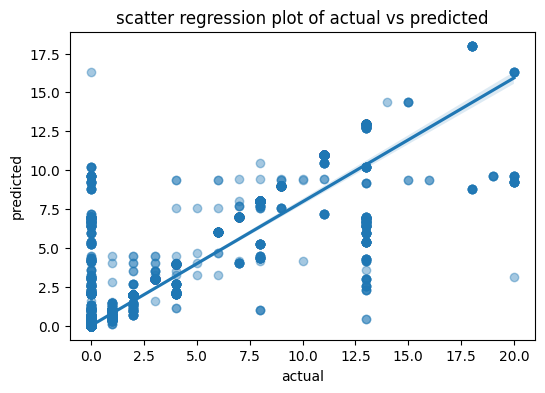

In [175]:
# Plot real vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=rf_preds, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Model training (for Driver Simulation)

In [ ]:
df.dropna(inplace = True)

In [ ]:
X = df[['Hour', 'direction', 'Min', 'Sec', 'Day_of_week', 'longitude','latitude','nearest_bus_stop']]
y = df['waiting_passengers']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# XGBoost Regression Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [ ]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
print(xg_model.score(X_test, y_test))

Random Forest RMSE: 0.049118117323779735
XGBoost RMSE: 0.22469830234465157
0.9945932614073328
0.8868507742881775


In [ ]:
demand_model_driver = rf_model

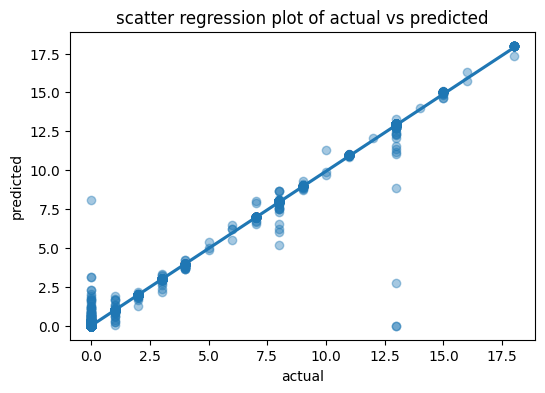

In [ ]:
# Plot real vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=rf_preds, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Model Testing

In [ ]:
df[(df['Board'] == 1) & (df['Hour'] == 4) & (df['direction'] == 1) & (df['Min'] == 15) & df['Day_of_week'] = ]['nearest_bus_stop'].value_counts()

nearest_bus_stop
20.0    4
Name: count, dtype: int64

In [ ]:
X = df[['Hour', 'Min', 'direction', 'Date', 'Sec', 'Day_of_week', 'nearest_bus_stop']]

KeyError: "['Date'] not in index"

In [ ]:
print

<function print>

In [ ]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, rf_model.predict([[i, j, 1, 1, 0]]))

4 0 1 [0.]
4 1 1 [0.]
4 2 1 [0.]
4 3 1 [0.]
4 4 1 [0.]
4 5 1 [0.]
4 6 1 [0.]
4 7 1 [0.]
4 8 1 [0.]
4 9 1 [0.]
4 10 1 [0.]
4 11 1 [0.]
4 12 1 [0.]
4 13 1 [0.]
4 14 1 [0.]
4 15 1 [0.]
4 16 1 [0.]
4 17 1 [0.]
4 18 1 [0.]
4 19 1 [0.]
4 20 1 [0.]
4 21 1 [0.]
4 22 1 [0.]
4 23 1 [0.]
4 24 1 [0.]
4 25 1 [0.]
4 26 1 [0.]
4 27 1 [0.]
4 28 1 [0.]
4 29 1 [0.]
4 30 1 [0.]
4 31 1 [0.]
4 32 1 [0.]
4 33 1 [0.]
4 34 1 [0.]
4 35 1 [0.]
4 36 1 [0.]
4 37 1 [0.]
4 38 1 [0.]
4 39 1 [0.]
4 40 1 [0.]
4 41 1 [0.]
4 42 1 [0.]
4 43 1 [0.]
4 44 1 [0.]
4 45 1 [0.]
4 46 1 [0.]
4 47 1 [0.]
4 48 1 [0.]
4 49 1 [0.]
4 50 1 [0.]
4 51 1 [0.]
4 52 1 [0.]
4 53 1 [0.]
4 54 1 [0.]
4 55 1 [0.]
4 56 1 [0.]
4 57 1 [0.]
4 58 1 [0.]
4 59 1 [0.]
5 0 1 [0.]
5 1 1 [0.]
5 2 1 [0.]
5 3 1 [0.]
5 4 1 [0.]
5 5 1 [0.]
5 6 1 [0.]
5 7 1 [0.]
5 8 1 [0.]
5 9 1 [0.]
5 10 1 [0.]
5 11 1 [0.]
5 12 1 [0.]
5 13 1 [0.]
5 14 1 [0.]
5 15 1 [0.]
5 16 1 [0.]
5 17 1 [0.]
5 18 1 [0.]
5 19 1 [0.]
5 20 1 [0.]
5 21 1 [0.]
5 22 1 [0.]
5 23 1 [0.]
5 24 1 [0.]


In [ ]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, xg_model.predict([[i, j, 1, 1, 10]]))

4 0 1 [0.5356792]
4 1 1 [0.5358939]
4 2 1 [0.5366601]
4 3 1 [0.5193796]
4 4 1 [0.51886785]
4 5 1 [0.51886785]
4 6 1 [0.508883]
4 7 1 [0.5075498]
4 8 1 [0.5147137]
4 9 1 [0.5147137]
4 10 1 [0.40875277]
4 11 1 [0.40875277]
4 12 1 [0.40796664]
4 13 1 [0.5098065]
4 14 1 [0.5094983]
4 15 1 [0.5094983]
4 16 1 [0.5122629]
4 17 1 [0.5131296]
4 18 1 [0.5131296]
4 19 1 [0.51364046]
4 20 1 [0.51364046]
4 21 1 [0.51364046]
4 22 1 [0.50590056]
4 23 1 [0.50590056]
4 24 1 [0.11009039]
4 25 1 [0.7226036]
4 26 1 [0.6297955]
4 27 1 [0.68671644]
4 28 1 [0.69668967]
4 29 1 [0.8582666]
4 30 1 [0.7848078]
4 31 1 [0.7695035]
4 32 1 [1.1396378]
4 33 1 [0.54591066]
4 34 1 [-0.04948987]
4 35 1 [-0.03866452]
4 36 1 [-0.03091966]
4 37 1 [-0.02908542]
4 38 1 [-0.02825015]
4 39 1 [-0.02925751]
4 40 1 [-0.01760429]
4 41 1 [-0.01386812]
4 42 1 [0.02251188]
4 43 1 [0.00846848]
4 44 1 [-0.00627748]
4 45 1 [-0.00478945]
4 46 1 [0.01568951]
4 47 1 [1.1689701]
4 48 1 [0.37423185]
4 49 1 [0.8783565]
4 50 1 [0.96744347]
4 5